In [13]:
corpus=open("corpus.txt").read()

In [14]:
corpus

'Next Word Prediction is also called Language Modeling. It is the task of predicting what word comes next. It is one of the fundamental tasks of NLP and has many applications. You might be using it daily when you write texts or emails without realizing it.'

In [15]:
#preprocess the corpus
import re
corpus=corpus.lower()
clean_corpus=re.sub('[^a-z0-9]+',' ', corpus)

In [16]:
clean_corpus

'next word prediction is also called language modeling it is the task of predicting what word comes next it is one of the fundamental tasks of nlp and has many applications you might be using it daily when you write texts or emails without realizing it '

In [17]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shail\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
from nltk.tokenize import word_tokenize


In [21]:
pip install keras


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow in c:\users\shail\appdata\local\programs\python\python311\lib\site-packages (2.12.0)




[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
from keras.utils import to_categorical


In [24]:
import numpy as np


In [25]:
tokens = word_tokenize(clean_corpus)

In [26]:
tokens

['next',
 'word',
 'prediction',
 'is',
 'also',
 'called',
 'language',
 'modeling',
 'it',
 'is',
 'the',
 'task',
 'of',
 'predicting',
 'what',
 'word',
 'comes',
 'next',
 'it',
 'is',
 'one',
 'of',
 'the',
 'fundamental',
 'tasks',
 'of',
 'nlp',
 'and',
 'has',
 'many',
 'applications',
 'you',
 'might',
 'be',
 'using',
 'it',
 'daily',
 'when',
 'you',
 'write',
 'texts',
 'or',
 'emails',
 'without',
 'realizing',
 'it']

In [27]:
train_len = 3


In [28]:
text_sequences = []
for i in range(train_len,len(tokens)+1):
  seq = tokens[i-train_len:i]
  text_sequences.append(seq)

In [29]:
text_sequences


[['next', 'word', 'prediction'],
 ['word', 'prediction', 'is'],
 ['prediction', 'is', 'also'],
 ['is', 'also', 'called'],
 ['also', 'called', 'language'],
 ['called', 'language', 'modeling'],
 ['language', 'modeling', 'it'],
 ['modeling', 'it', 'is'],
 ['it', 'is', 'the'],
 ['is', 'the', 'task'],
 ['the', 'task', 'of'],
 ['task', 'of', 'predicting'],
 ['of', 'predicting', 'what'],
 ['predicting', 'what', 'word'],
 ['what', 'word', 'comes'],
 ['word', 'comes', 'next'],
 ['comes', 'next', 'it'],
 ['next', 'it', 'is'],
 ['it', 'is', 'one'],
 ['is', 'one', 'of'],
 ['one', 'of', 'the'],
 ['of', 'the', 'fundamental'],
 ['the', 'fundamental', 'tasks'],
 ['fundamental', 'tasks', 'of'],
 ['tasks', 'of', 'nlp'],
 ['of', 'nlp', 'and'],
 ['nlp', 'and', 'has'],
 ['and', 'has', 'many'],
 ['has', 'many', 'applications'],
 ['many', 'applications', 'you'],
 ['applications', 'you', 'might'],
 ['you', 'might', 'be'],
 ['might', 'be', 'using'],
 ['be', 'using', 'it'],
 ['using', 'it', 'daily'],
 ['it', 'd

In [30]:
from keras.preprocessing.text import Tokenizer

In [31]:
#converting the texts into integer sequence
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences)
sequences

[[7, 6, 8],
 [6, 8, 2],
 [8, 2, 9],
 [2, 9, 10],
 [9, 10, 11],
 [10, 11, 12],
 [11, 12, 1],
 [12, 1, 2],
 [1, 2, 4],
 [2, 4, 13],
 [4, 13, 3],
 [13, 3, 14],
 [3, 14, 15],
 [14, 15, 6],
 [15, 6, 16],
 [6, 16, 7],
 [16, 7, 1],
 [7, 1, 2],
 [1, 2, 17],
 [2, 17, 3],
 [17, 3, 4],
 [3, 4, 18],
 [4, 18, 19],
 [18, 19, 3],
 [19, 3, 20],
 [3, 20, 21],
 [20, 21, 22],
 [21, 22, 23],
 [22, 23, 24],
 [23, 24, 5],
 [24, 5, 25],
 [5, 25, 26],
 [25, 26, 27],
 [26, 27, 1],
 [27, 1, 28],
 [1, 28, 29],
 [28, 29, 5],
 [29, 5, 30],
 [5, 30, 31],
 [30, 31, 32],
 [31, 32, 33],
 [32, 33, 34],
 [33, 34, 35],
 [34, 35, 1]]

In [32]:
sequences=np.asarray(sequences)


In [33]:
#vocabulary size
vocabulary_size = len(tokenizer.word_counts)+1
vocabulary_size
     

36

In [34]:
#trainX
train_inputs=sequences[:,:-1]

In [35]:
train_inputs
     

array([[ 7,  6],
       [ 6,  8],
       [ 8,  2],
       [ 2,  9],
       [ 9, 10],
       [10, 11],
       [11, 12],
       [12,  1],
       [ 1,  2],
       [ 2,  4],
       [ 4, 13],
       [13,  3],
       [ 3, 14],
       [14, 15],
       [15,  6],
       [ 6, 16],
       [16,  7],
       [ 7,  1],
       [ 1,  2],
       [ 2, 17],
       [17,  3],
       [ 3,  4],
       [ 4, 18],
       [18, 19],
       [19,  3],
       [ 3, 20],
       [20, 21],
       [21, 22],
       [22, 23],
       [23, 24],
       [24,  5],
       [ 5, 25],
       [25, 26],
       [26, 27],
       [27,  1],
       [ 1, 28],
       [28, 29],
       [29,  5],
       [ 5, 30],
       [30, 31],
       [31, 32],
       [32, 33],
       [33, 34],
       [34, 35]])

In [36]:
#input sequence length 
seq_length=train_inputs.shape[1]
seq_length
     

2

In [37]:
#trainY
train_targets=sequences[:,-1]
     

In [38]:
train_targets
     

array([ 8,  2,  9, 10, 11, 12,  1,  2,  4, 13,  3, 14, 15,  6, 16,  7,  1,
        2, 17,  3,  4, 18, 19,  3, 20, 21, 22, 23, 24,  5, 25, 26, 27,  1,
       28, 29,  5, 30, 31, 32, 33, 34, 35,  1])

In [39]:
#one hot encoding
train_targets = to_categorical(train_targets, num_classes=vocabulary_size)

In [40]:
train_targets

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [41]:
import torch

In [42]:
from torch.optim import Adam

In [3]:
import torch.nn as nn

In [44]:
#lstm model
class lstm(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size):
        super().__init__()
        #simple lookup table that stores embeddings of a fixed dictionary and size.
        self.embed = nn.Embedding(vocab_size, embed_size)
        
        #lstm 
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers=2, bidirectional=False)
        
        #fully connected layer
        self.linear = nn.Linear(hidden_size*seq_length,vocab_size)
    
    def forward(self, input_word):
        #input sequence to embeddings
        embedded = self.embed(input_word)
        
        #passing the embedding to lstm model
        output, hidden = self.lstm(embedded)
        
        #reshaping
        output=output.view(output.size(0), -1)
        
        #fully connected layer
        output = self.linear(output)
        return output,hidden


model=lstm(vocab_size=vocabulary_size,embed_size=128, hidden_size=256)

In [45]:
model

lstm(
  (embed): Embedding(36, 128)
  (lstm): LSTM(128, 256, num_layers=2)
  (linear): Linear(in_features=512, out_features=36, bias=True)
)

In [46]:
#Adam optimizer
optimizer= Adam(model.parameters(), lr=0.07)

#loss
criterion = nn.BCEWithLogitsLoss()

In [66]:
#training the model
def train(epoch):
    #set the model to train
    model.train()
    tr_loss=0    
    
    #clearing the Gradients 
    optimizer.zero_grad()
    
    #predict the output
    y_pred, (state_h, state_c) = model(torch.from_numpy(train_inputs))
    
    #compute the loss
    loss=criterion(y_pred,torch.from_numpy(train_targets))
    losses.append(loss)
    
    #backpropagate
    loss.backward()

    #update the parameters
    optimizer.step()
    tr_loss = loss.item()

    print("Epoch : ",epoch,"loss : ",loss)
     


In [67]:
#number of epoch
no_epoch=50
losses=[]
for epoch in range(1,no_epoch+1):
    train(epoch)

Epoch :  1 loss :  tensor(4.8970e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  2 loss :  tensor(4.8542e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  3 loss :  tensor(4.8123e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  4 loss :  tensor(4.7709e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  5 loss :  tensor(4.7304e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  6 loss :  tensor(4.6906e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  7 loss :  tensor(4.6514e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  8 loss :  tensor(4.6128e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  9 loss :  tensor(4.5749e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  10 loss :  tensor(4.5376e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  11 loss :  tensor(4.5010e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  12 loss :  tensor(4.4649e-05, gr

In [68]:
import matplotlib.pyplot as plt


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

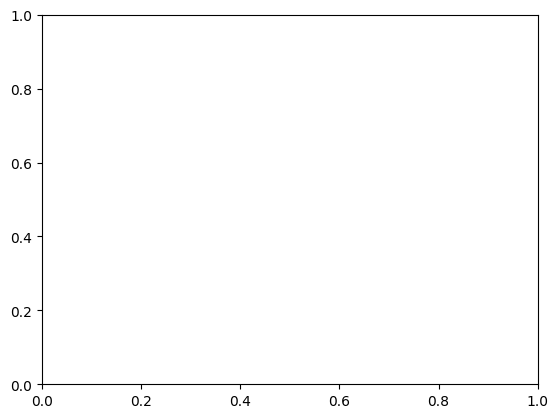

In [69]:
plt.plot(losses, label='Training loss')
plt.show()